# Co-occurrence analysis of 16S buccal microbiota using ONT data
## by Javier C. Alvarez, 2024

After running the 16S-wf pipeline from Epi2Me, where abundance and diversity index were calculated, forward analysis can be implemented to correlate microbe groups that are co-occurring. <br>
One of the most frequently used avenues for inferring co-occurrence networks is the parsing and analysis of 16S sequencing data (see Fig 1. a standard workflow for this purpuse). <br>

The importance of these networks is twofold: first, they can serve as maps that help identify hubs of keystone species and the community response to environmental perturbations or underlying host conditions; second, they can serve as a bridge toward building mechanistic models of microbial communities, greatly enhancing our capacity to understand and control them. For example, multiple studies have shown the importance of specific microbial associations in the healthy microbiome and their role in dysbiosis. In the context of terrestrial biogeochemistry, co-occurrence networks were shown to help understand microbiome assembly and the response of microbial communities to environmental perturbations.  (text taken from DOI: https://doi.org/10.1128/msystems.00961-22) <br>

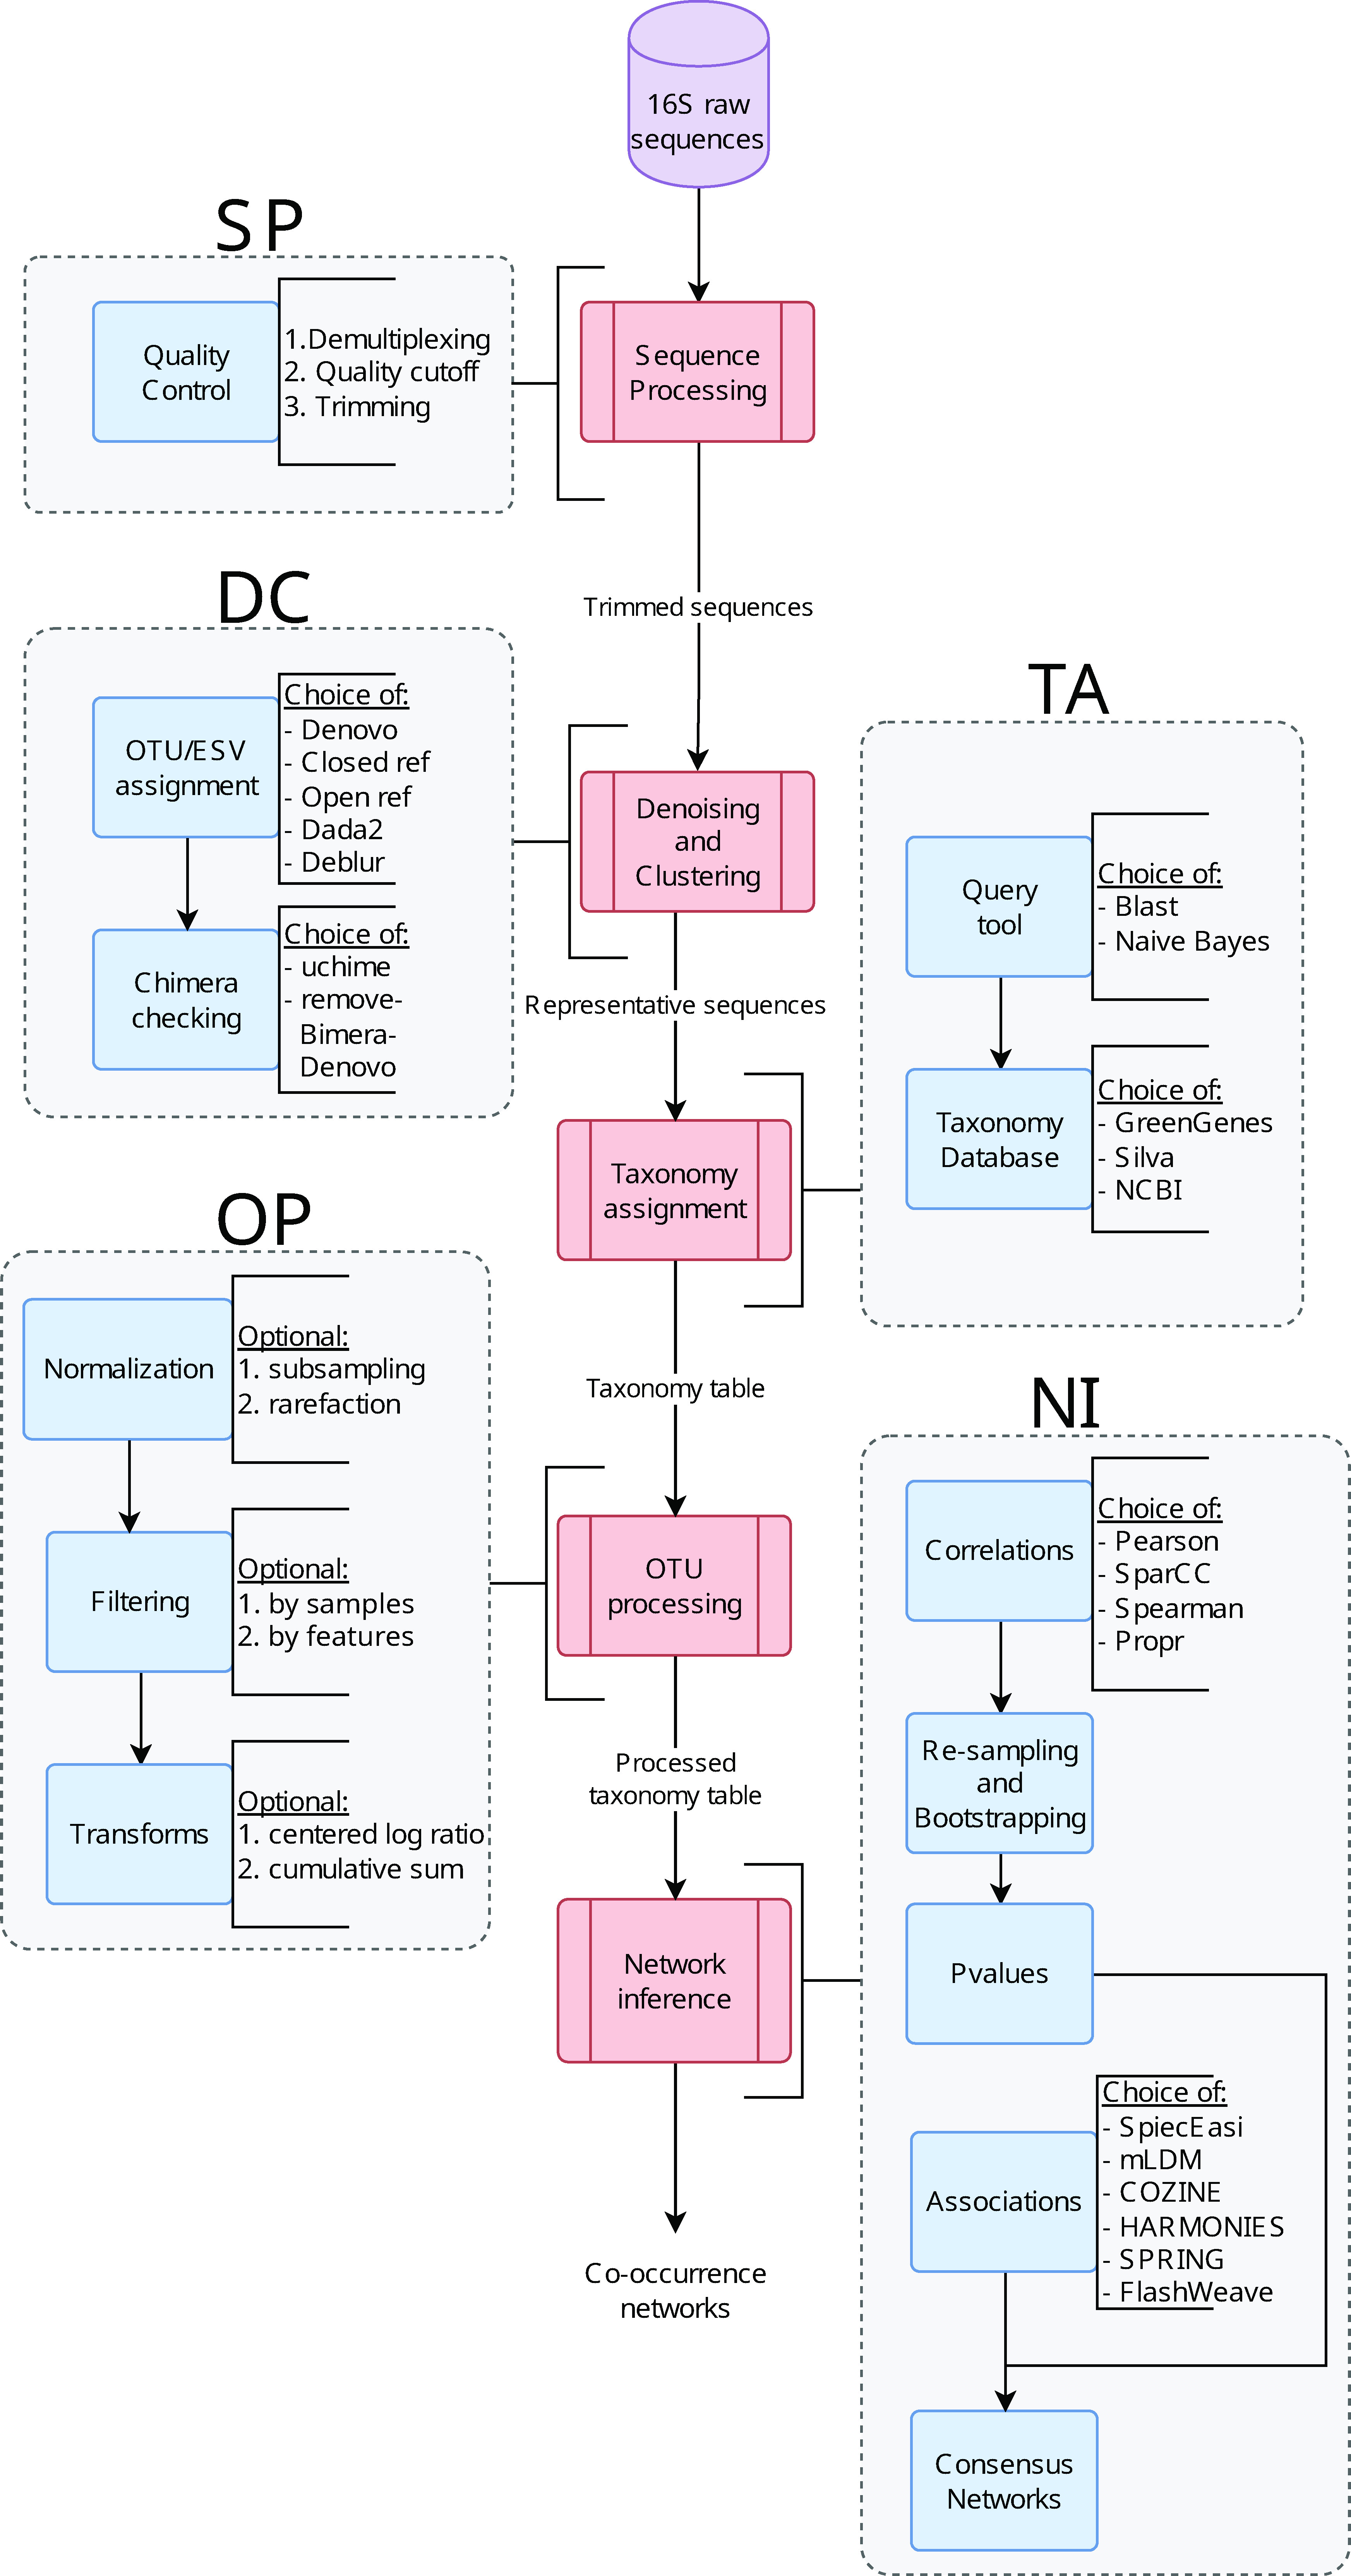

# Running SCNIC

In [ ]:
#Creating env and installing Qiime2
!conda env create -n qiime2-metagenome-2024.5 --file https://data.qiime2.org/distro/metagenome/qiime2-metagenome-2024.5-py39-linux-conda.yml


In [ ]:
!conda activate qiime2-metagenome-2024.5

In [ ]:
#Convertir cada archivo ASVs a objeto .biom
!biom convert -i abundance_table_genus.tsv -o featuretable_wf-16s.biom --table-type "Table" --to-hdf5

In [ ]:
#convertir cada .biom a tabla Features
!qiime tools import --input-path featuretable_wf-16s.biom --type FeatureTable[Frequency] --output-path featuretable.qza

In [ ]:
#hacer merge de archivos
# Esto ya no hya que hacerlo
#!qiime feature-table merge --i-tables table1.qza table2.qza --o-merged-table merged_table.qza

In [ ]:
#update of your blas version
!conda install -c conda-forge blas=1.1

In [ ]:
#instalar SCNIC
!pip install scnic

In [ ]:
!pip install git+https://github.com/lozuponelab/q2-SCNIC.git

In [ ]:
!qiime dev refresh-cache

In [ ]:
#Runining SCNIC filter 1
!qiime SCNIC sparcc-filter --i-table featuretable.qza --o-table-filtered test_data-filtered.qza

Entrar a este link: <br>
https://medium.com/@r11b45017/construct-a-microbiome-correlation-network-using-qiime2-and-visualise-with-cytoscape-c696f519a106

In [ ]:
#Calculation correlation
!qiime SCNIC calculate-correlations --i-table test_data-filtered.qza --p-method pearson --o-correlation-table feature_table_correls.qza

In [ ]:
#Making a correlation network
!qiime SCNIC build-correlation-network-r --i-correlation-table feature_table_correls.qza --p-min-val .35 --o-correlation-network fake_net.qza

In [ ]:
#Crear un ambiente nuevo con una versión anterior de Qiime
!wget https://data.qiime2.org/distro/tiny/qiime2-tiny-2024.2-py38-linux-conda.yml
!conda env create -n qiime2-tiny-2024.2 --file qiime2-tiny-2024.2-py38-linux-conda.yml
!conda activate qiime2-tiny-2024.2
#Volver a actualizar blas e instalar SCNIC

In [ ]:
#Detect and summarise modules of features
!qiime SCNIC make-modules-on-correlations \
--i-correlation-table feature_table_correls.qza \
--i-feature-table featuretable.qza \
--p-min-r .35 \
--o-collapsed-table feature_table.collapsed.qza \
--o-correlation-network feature_table_net.modules.qza \
--o-module-membership feature_table_membership.qza

#install cytoscape from:
https://cytoscape.org/
data.collapsed.qza is a feature table you can use with any further non-phylogenetic analysis. fake_net.modules.qza is a network that is annotated with correlation information as well as module membership and can be exported from the .qza to visualize with tools such as Cytoscape.

https://github.com/lozuponelab/q2-SCNIC/blob/master/community_tutorial.md

In [ ]:
#to make a viewable as metadata and can be turned into a visualization via this command:
!qiime metadata tabulate --m-input-file feature_table_membership.qza --o-visualization feature_membership.qzv

In [ ]:
#Or export the data
!qiime tools export \
--input-path feature_table_net.modules.qza \
--output-path out_SCNIC/

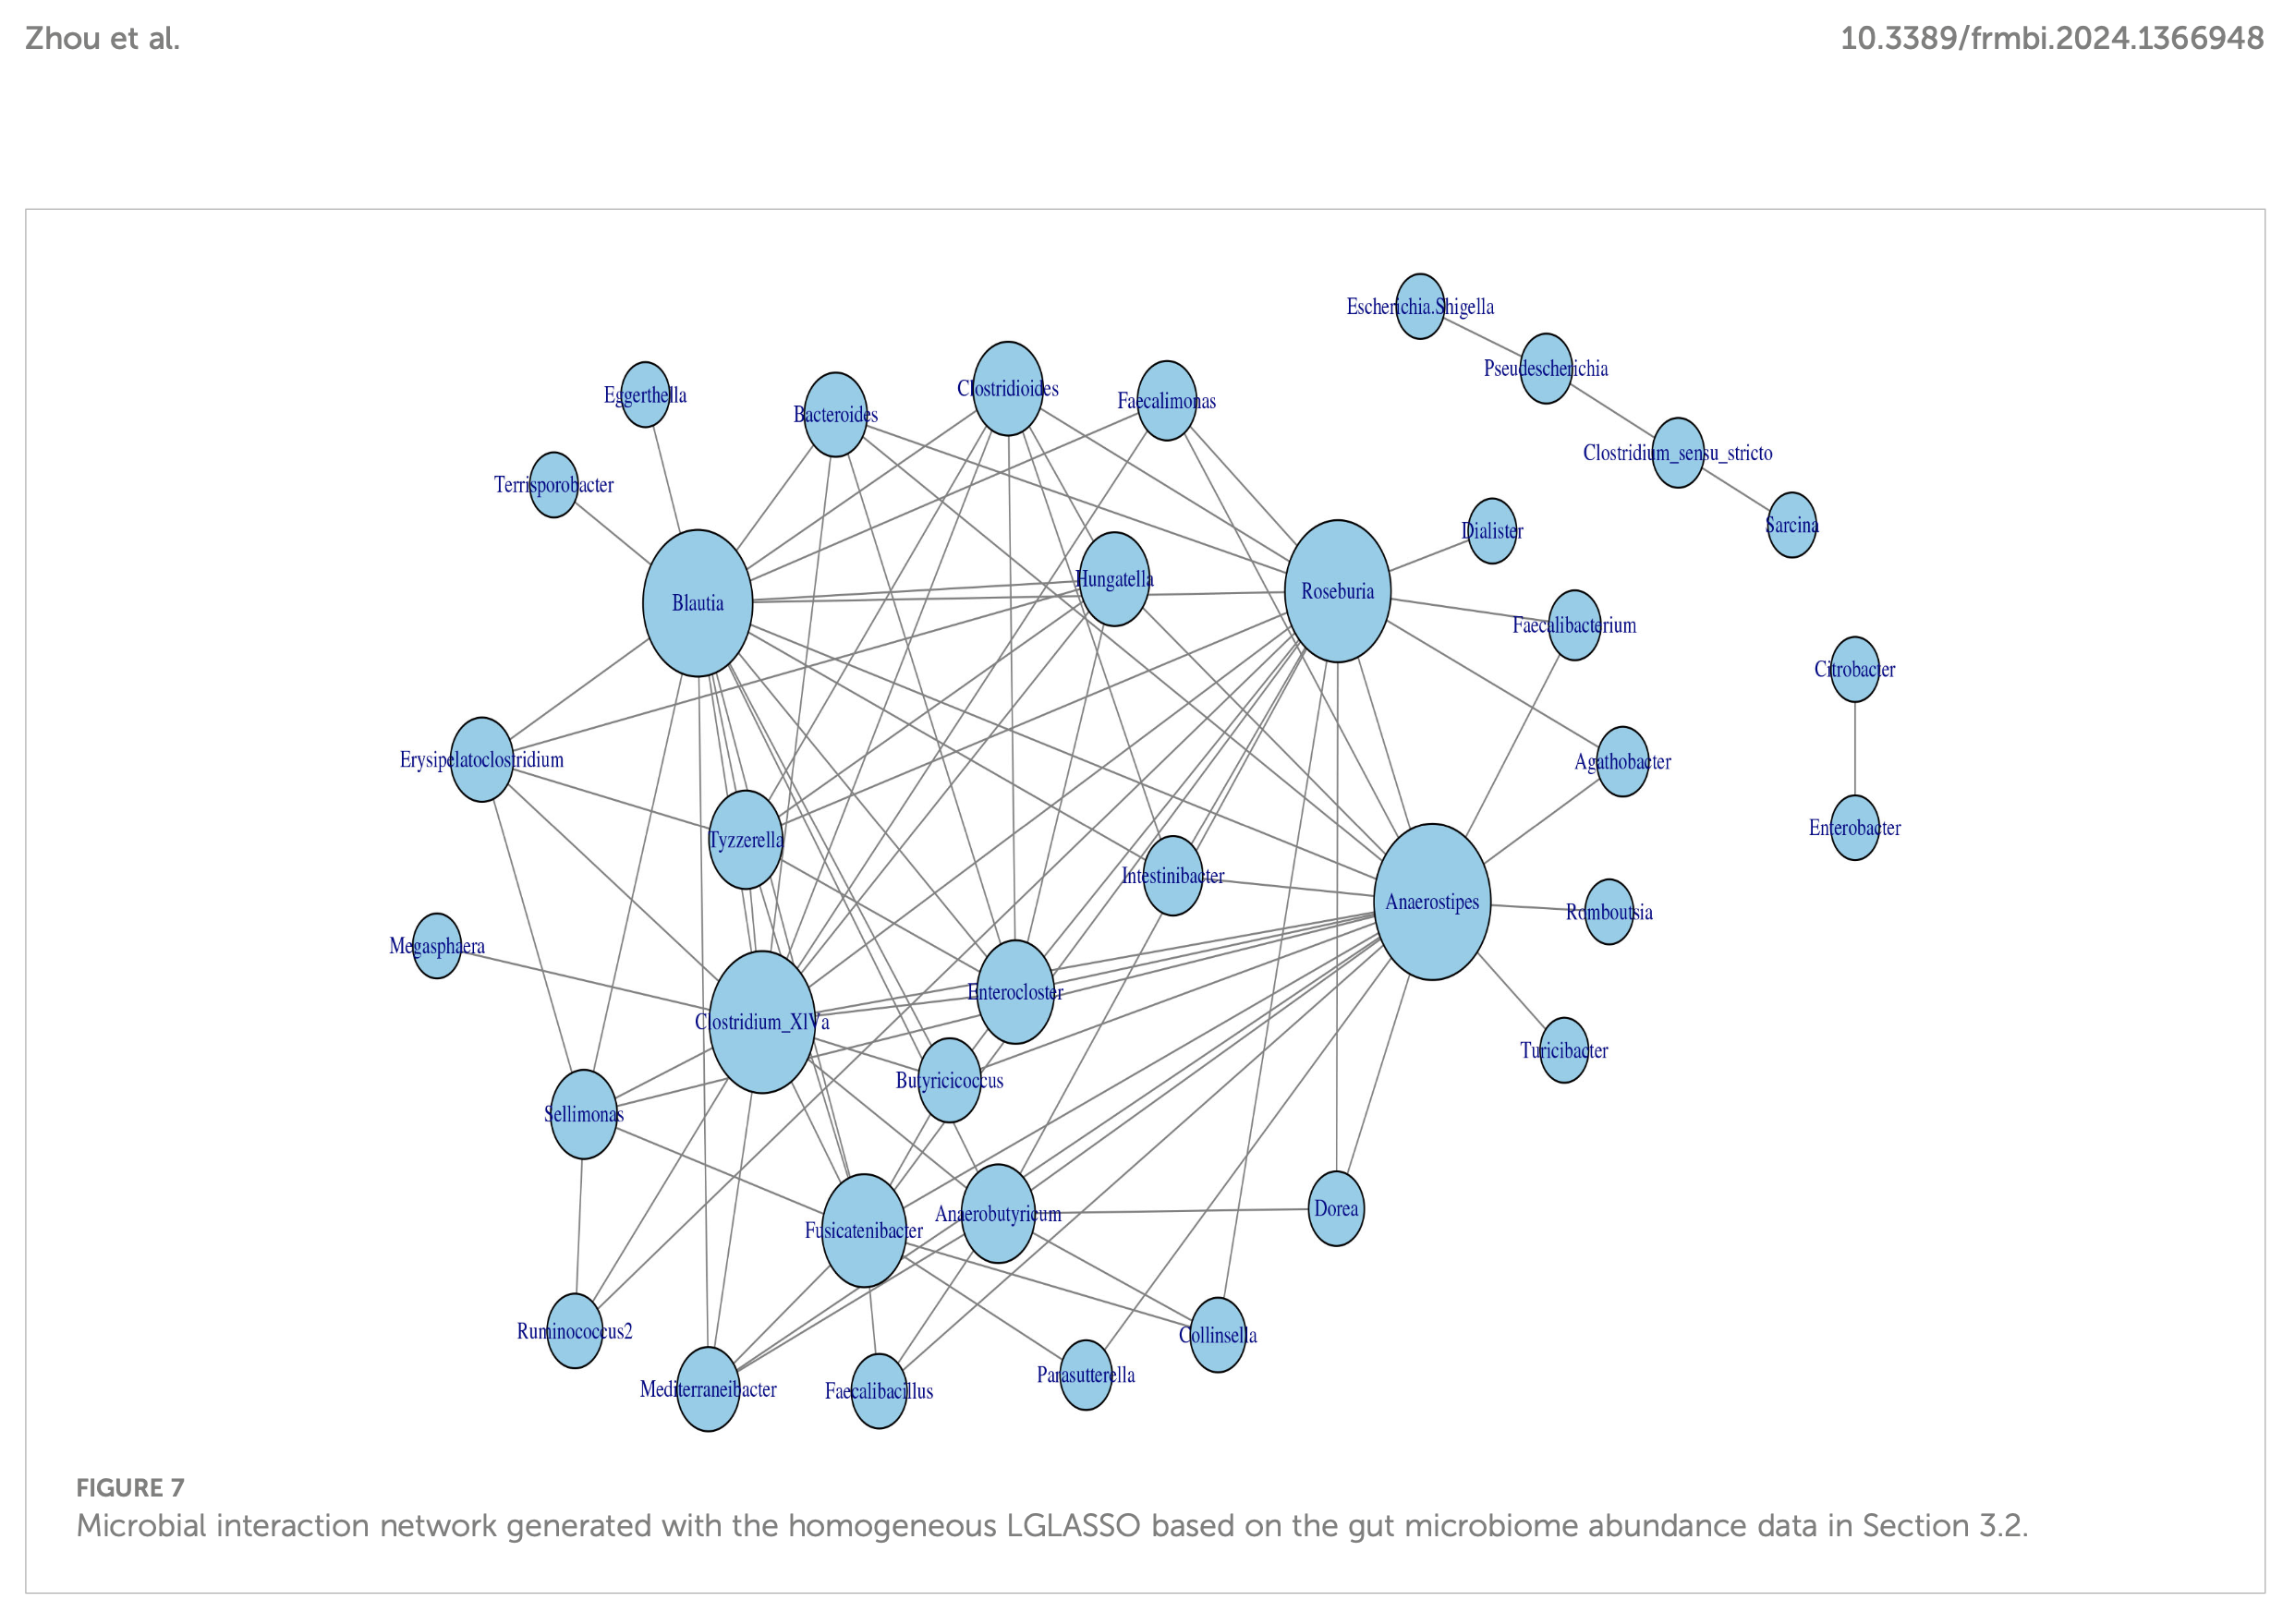

## Task after running SCNIC:
1. Download file.gml and load to cytoscape
2. Analyse the network clustering by modules and editing the node labels
3. Compare the different treatments making four networks
4. Create a picture as it is showing in Fig 4. at https://journals.asm.org/doi/10.1128/msystems.00886-21
5. Discuss the results comparing them with the previously reported data for this kind of microbiota
6. Report in a LaTeX document all the analysis of the 16S_wf pipeline for the treatments implemented and the co-occurrence analysis, including the network depuration and visualization.